# Avatar questionnaire processing  

## Import packages 

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
import re
from statsmodels.stats.anova import *


## Function creation

1. extraRow: Creates a function that takes:
 - **df** = a data frame and checks if any of the elements of 
 - **yourlist** have a partial match with the content of the values of 
 - **variable** your variable of interest, if so it assigns the correspondedn matching value to 
 - **newvariable** the name of variable you want as an output 


In [2]:
def extraRow(df,yourlist,variable,newVariable):
    '''Creates a new variable that contains matching data from preexiting variable
    
Parameters
-------------
     
     df: your data frame,
     yourlist: List of values you want to target for the partial match search
     variable: Variable that may cointain the elements on yourlist
     newvariable: Name for  New Variable 
     
returns 
----------

    DataFrame
     '''
    for idx, row in df.iterrows():
        for l in yourlist:
            if l in row[variable]:
                df.loc[idx, newVariable] = l

## Preprocessing 

In [3]:
# Data set loading
df_file = '/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/AvatarQuestionnaire/AvaQuest.csv'
df = pd.read_csv(df_file, sep= ',', header=None)
df.head()

,0,1,2,3
0,1,Remember_01_CmA,4,4597
1,1,Realistic_01_CmA,3,4597
2,1,Attractive_01_CmA,1,4597
3,2,Remember_29_Sa,1,4597
4,2,Realistic_29_Sa,2,4597


In [4]:
df = df.rename({0: 'order', 1: 'item', 2: 'likert', 3: 'ID'}, axis=1)
df.head()

,order,item,likert,ID
0,1,Remember_01_CmA,4,4597
1,1,Realistic_01_CmA,3,4597
2,1,Attractive_01_CmA,1,4597
3,2,Remember_29_Sa,1,4597
4,2,Realistic_29_Sa,2,4597


In [5]:
#Initial exploration of the data set 
df.item = df['item'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   order   3192 non-null   int64   
 1   item    3192 non-null   category
 2   likert  3192 non-null   int64   
 3   ID      3192 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 86.6 KB


In [6]:
#Creating Clarity Categorical variable 
df['avatarCat'] = df['item'].str.contains('Sa')
df.loc[:, 'avatarCategory'] = df['avatarCat'].replace({True: 'Standing', False: 'Action'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   order           3192 non-null   int64   
 1   item            3192 non-null   category
 2   likert          3192 non-null   int64   
 3   ID              3192 non-null   int64   
 4   avatarCat       3192 non-null   bool    
 5   avatarCategory  3192 non-null   object  
dtypes: bool(1), category(1), int64(3), object(1)
memory usage: 114.6+ KB


In [7]:
df.head()

,order,item,likert,ID,avatarCat,avatarCategory
0,1,Remember_01_CmA,4,4597,False,Action
1,1,Realistic_01_CmA,3,4597,False,Action
2,1,Attractive_01_CmA,1,4597,False,Action
3,2,Remember_29_Sa,1,4597,True,Standing
4,2,Realistic_29_Sa,2,4597,True,Standing


In [8]:
#Checking that value counts for Action and Standing avatars corresponds with the number of participants
df.avatarCat.value_counts()

False    1596
True     1596
Name: avatarCat, dtype: int64

In [9]:
#List of values for iteration search 
itemCat = ['Remember','Realistic', 'Attractive']

#Searching for a partial string 'ItemCat' in variable 'Item' to creat a new variable 'ItemCat'
extraRow(df,itemCat,'item','itemCategory')
df.tail(5)

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory
3187,55,Realistic_06_CmA,3,5531,False,Action,Realistic
3188,55,Attractive_06_CmA,4,5531,False,Action,Attractive
3189,56,Remember_56_Sa,1,5531,True,Standing,Remember
3190,56,Realistic_56_Sa,3,5531,True,Standing,Realistic
3191,56,Attractive_56_Sa,4,5531,True,Standing,Attractive


In [10]:
#Extracting the Avatar number from the variable 'Item'
AvaIDs = []
for idx, row in df.iterrows():
    num = re.findall(r'\d+', row['item']) 
    AvaIDs.append(num)
    #Flatten the list: Every number was returned as a list of it's own with this we get one unified list
    avatarIDsf = [item for sublist in AvaIDs for item in sublist]


In [11]:
#Searching for a partial string contained in the lists "AvatarIDsf" in variable "Item" to creat a new variable "AvatarID"
extraRow(df,avatarIDsf,'item','avatarID')
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
1,1,Realistic_01_CmA,3,4597,False,Action,Realistic,01
2,1,Attractive_01_CmA,1,4597,False,Action,Attractive,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
4,2,Realistic_29_Sa,2,4597,True,Standing,Realistic,29


# Descriptives 

In [12]:
#Average values Support and clarity 
df.groupby('avatarCategory')['likert'].describe()

,count,mean,std,min,25%,50%,75%,max
avatarCategory,,,,,,,,
Action,1596.0,2.885338,1.212789,1.0,2.0,3.0,4.0,5.0
Standing,1596.0,2.160401,1.070241,1.0,1.0,2.0,3.0,5.0


In [13]:
#Average values Support and clarity 
df.groupby(['avatarCategory','itemCategory'])['likert'].describe().sort_values(by='mean')

count      mean       std  min  25%  50%  75%  \
avatarCategory itemCategory                                                  
Standing       Remember      532.0  1.588346  0.864499  1.0  1.0  1.0  2.0   
               Attractive    532.0  2.073308  0.974381  1.0  1.0  2.0  3.0   
Action         Attractive    532.0  2.437970  1.072647  1.0  2.0  2.0  3.0   
Standing       Realistic     532.0  2.819549  0.986421  1.0  2.0  3.0  4.0   
Action         Remember      532.0  2.828947  1.399108  1.0  2.0  3.0  4.0   
               Realistic     532.0  3.389098  0.923084  1.0  3.0  3.0  4.0   

                             max  
avatarCategory itemCategory       
Standing       Remember      5.0  
               Attractive    5.0  
Action         Attractive    5.0  
Standing       Realistic     5.0  
Action         Remember      5.0  
               Realistic     5.0

In [14]:
AvatarIDsL = df.pivot_table('likert',  'avatarID').sort_values(by='likert')
AvatarIDsL

,likert
avatarID,
33,1.526316
31,1.631579
53,1.684211
37,1.754386
45,1.842105
39,1.894737
51,1.912281
27,1.912281
30,2.000000


## Data Visualization

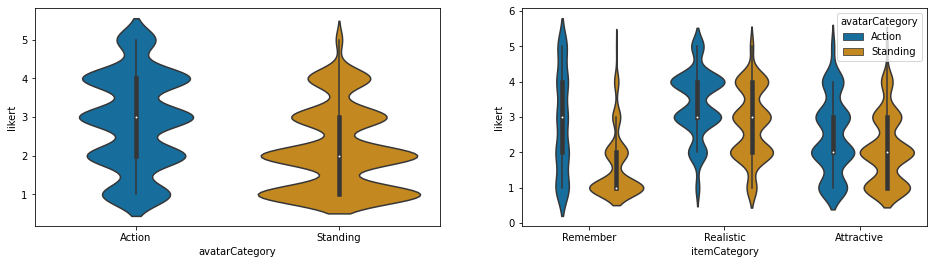

In [15]:
sns.set_palette('colorblind')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.violinplot(data= df, x='avatarCategory', y='likert', ax=axes[0])
sns.violinplot(data= df, x='itemCategory', y='likert', hue= 'avatarCategory',  ax=axes[1])
plt.show()

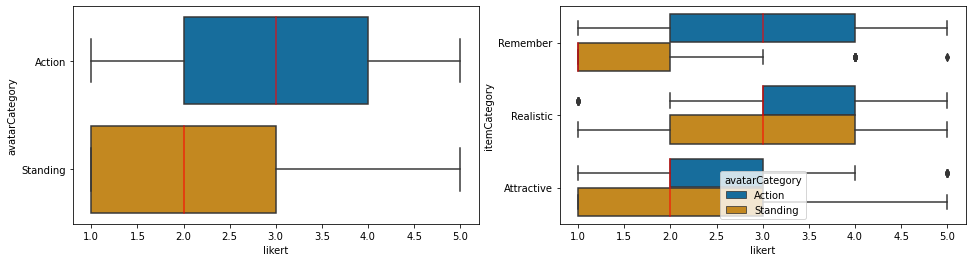

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.boxplot(data= df, y='avatarCategory', x='likert', orient="h",  medianprops=dict(color="red", alpha=0.7), ax=axes[0])
sns.boxplot(data= df, y='itemCategory', x='likert', hue= 'avatarCategory', orient="h",  medianprops=dict(color="red", alpha=0.7), ax=axes[1])
plt.show()

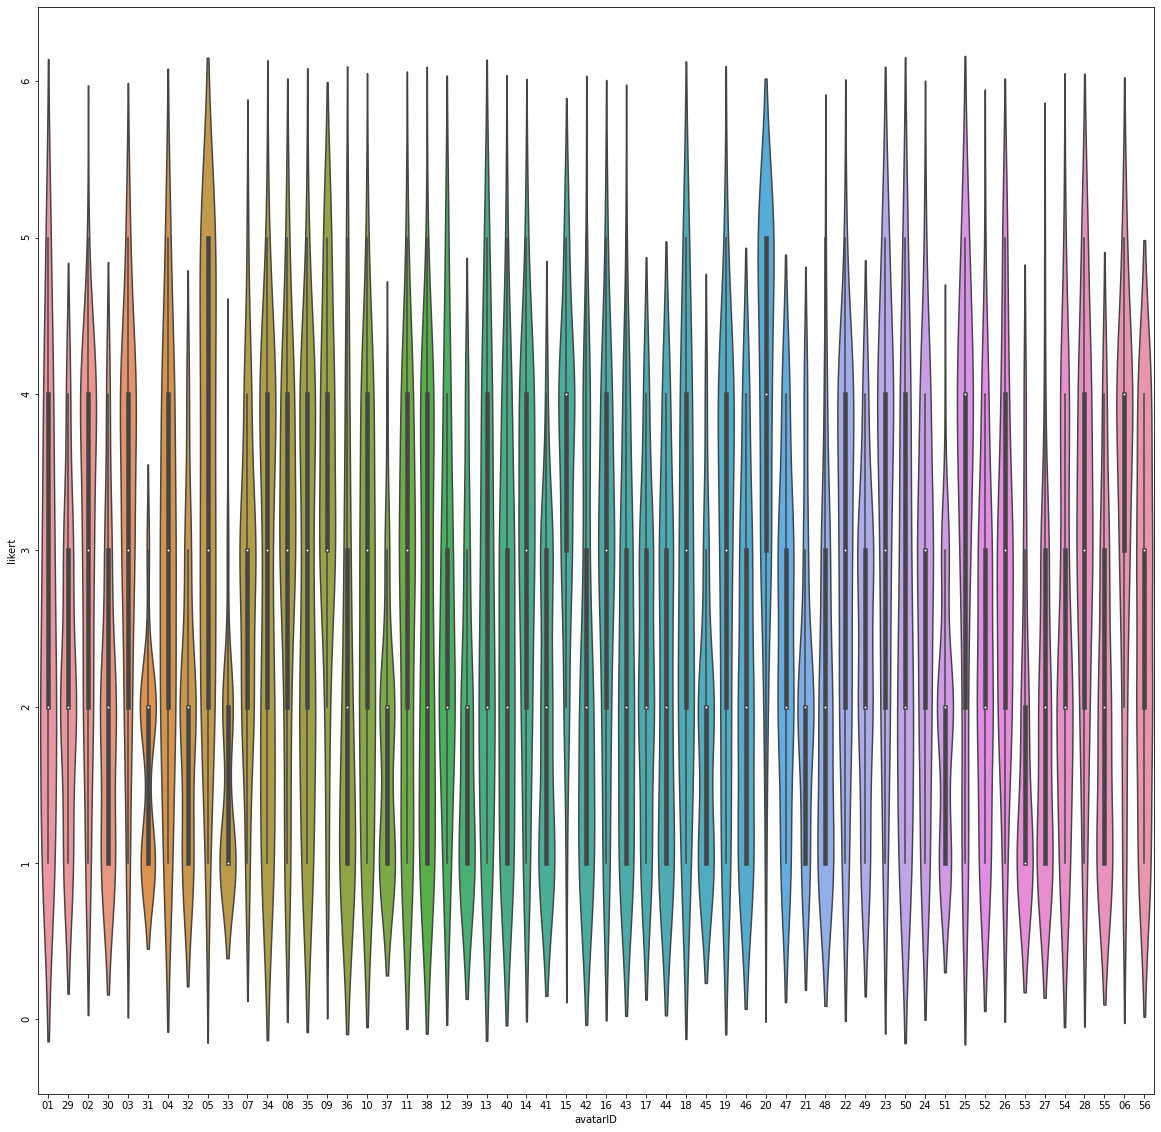

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
sns.violinplot(data= df, x='avatarID', y='likert', scale='width')
plt.yticks(rotation=90)
plt.show()

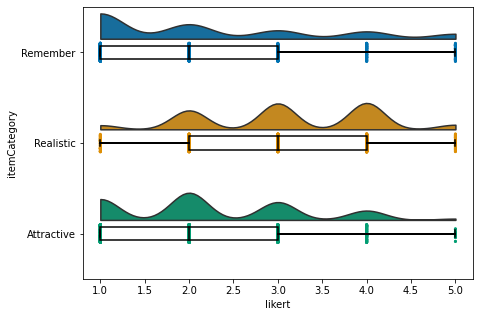

In [18]:
dy='itemCategory'; dx='likert'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
               saturation = 1, orient = ort) 

## Data analysis

In [19]:
from statsmodels.stats.anova import AnovaRM
help(AnovaRM)

Help on class AnovaRM in module statsmodels.stats.anova:

class AnovaRM(builtins.object)
 |  AnovaRM(data, depvar, subject, within=None, between=None, aggregate_func=None)
 |  
 |  Repeated measures Anova using least squares regression
 |  
 |  The full model regression residual sum of squares is
 |  used to compare with the reduced model for calculating the
 |  within-subject effect sum of squares [1].
 |  
 |  Currently, only fully balanced within-subject designs are supported.
 |  Calculation of between-subject effects and corrections for violation of
 |  sphericity are not yet implemented.
 |  
 |  Parameters
 |  ----------
 |  data : DataFrame
 |  depvar : str
 |      The dependent variable in `data`
 |  subject : str
 |      Specify the subject id
 |  within : list[str]
 |      The within-subject factors
 |  between : list[str]
 |      The between-subject factors, this is not yet implemented
 |  aggregate_func : {None, 'mean', callable}
 |      If the data set contains more than 

In [20]:
df1 = df[df['itemCategory']== 'Remember']
df1.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
6,3,Remember_02_CmA,4,4597,False,Action,Remember,02
9,4,Remember_30_Sa,1,4597,True,Standing,Remember,30
12,5,Remember_03_CmA,5,4597,False,Action,Remember,03


In [21]:
print(AnovaRM(data=df1, depvar='likert', subject='ID', within=['avatarCategory'], aggregate_func = 'mean').fit())

                   Anova
               F Value Num DF  Den DF Pr > F
--------------------------------------------
avatarCategory 94.0956 1.0000 18.0000 0.0000



In [22]:
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

In [23]:
# Define model formula
formula = 'avatarCat ~ likert'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df1, family = family_GLM).fit()
print(model_LM.summary())

                            Generalized Linear Model Regression Results                            
Dep. Variable:     ['avatarCat[False]', 'avatarCat[True]']   No. Observations:                 1064
Model:                                                 GLM   Df Residuals:                     1062
Model Family:                                     Binomial   Df Model:                            1
Link Function:                                       logit   Scale:                          1.0000
Method:                                               IRLS   Log-Likelihood:                -606.71
Date:                                     Mon, 02 May 2022   Deviance:                       1213.4
Time:                                             15:33:40   Pearson chi2:                 1.04e+03
No. Iterations:                                          4                                         
Covariance Type:                                 nonrobust                                         


In [24]:
# Define model formula
formula = 'likert ~ avatarCat '

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df1, family = family_LM).fit()
print(model_LM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 likert   No. Observations:                 1064
Model:                            GLM   Df Residuals:                     1062
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1.3524
Method:                          IRLS   Log-Likelihood:                -1669.4
Date:                Mon, 02 May 2022   Deviance:                       1436.3
Time:                        15:33:40   Pearson chi2:                 1.44e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8289      0.05

In [25]:
# Define model formula
formula = 'likert ~ avatarCat * itemCategory'

# Define probability distribution for the response variable for 
# the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = df, family = family_LM).fit()
print(model_LM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 likert   No. Observations:                 3192
Model:                            GLM   Df Residuals:                     3186
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          1.1050
Method:                          IRLS   Log-Likelihood:                -4685.6
Date:                Mon, 02 May 2022   Deviance:                       3520.5
Time:                        15:33:40   Pearson chi2:                 3.52e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------